In [1]:
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt

# Without correlations.

In [2]:
def efficiency(x):
    gamma = 1.41
    t1 = x[0]
    t2 = x[1]
    p1 = x[2]
    p2 = x[3]
    eta =  (t1 - t2) / ( t1 * (  (1.- (p2/p1)**((gamma - 1.)/gamma))) )
    return eta * 100.0

In [3]:
T01 = 1100.
T02 = 800.
P01 = 90.
P02 = 29.

In [4]:
t1 = Parameter(order=5, distribution='truncated-gaussian',shape_parameter_A = T01, shape_parameter_B= 0.15, upper = T01*1.1, lower=T01*0.95)
t2 = Parameter(order=5, distribution='truncated-gaussian',shape_parameter_A = T02, shape_parameter_B= 0.15, upper = T02*1.1, lower=T02*0.95)
p1 = Parameter(order=5, distribution='truncated-gaussian',shape_parameter_A = P01, shape_parameter_B= 0.15, upper = P01*1.1, lower=P01*0.95)
p2 = Parameter(order=5, distribution='truncated-gaussian',shape_parameter_A = P02, shape_parameter_B= 0.15, upper = P02*1.1, lower=P02*0.95)

In [5]:
myBasis = Basis('total-order')
mypoly = Poly(parameters=[t1, t2, p1, p2], basis=myBasis, method='least-squares', sampling_args={'mesh':'tensor-grid',
                                                                                       'sampling-ratio': 1.2,
                                                                                       'subsampling-algorithm': 'qr'})

In [6]:
mypoly.set_model(efficiency)
points = mypoly.get_points()

In [7]:
mean, var = mypoly.get_mean_and_variance()

In [8]:
print(mean, np.sqrt(var)*1.96)

97.20783827013106 2.0154365995939574


# With correlations.

In [9]:
R = np.array([[1.0, 0.9, 0.0, 0.0],
              [0.9, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.8],
              [0.0, 0.0, 0.8, 1.0]])

In [15]:
corr = Correlations(mypoly, R)
corr_efficiency = corr.set_model(efficiency)
#print(corr.get_points())
corrpoly = corr.get_transformed_poly()

In [16]:
mean, var = corrpoly.get_mean_and_variance()
print(mean, np.sqrt(var)*1.96)

97.20191083168606 1.4587454389105623


We only consider 2D plots for the temperature!

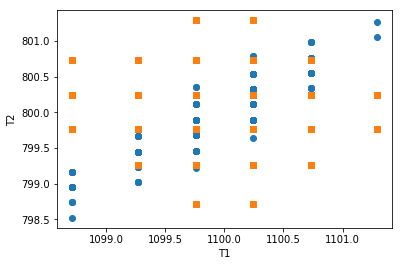

In [12]:
correlated_quadrature_points = corr.get_points()
standard_quadrature_points = mypoly.get_points()
plt.plot(correlated_quadrature_points[:,0], correlated_quadrature_points[:,1], 'o')
plt.plot(standard_quadrature_points[:,0], standard_quadrature_points[:,1], 's')
plt.xlabel('T1')
plt.ylabel('T2')
plt.show()